In [1]:
import os
os.chdir('../..')

import numpy as np
import pandas as pd
import torch
import pickle
from tqdm import tqdm
from molgrad.utils import DATA_PATH

In [2]:
with open(os.path.join(DATA_PATH, 'herg', 'data_herg.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)

In [3]:
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA
from rdkit.Chem.Lipinski import NumHDonors
from rdkit.Chem.Descriptors import MolWt

from rdkit.Chem.inchi import MolFromInchi

mws = []
logps = []
tpsas = []
nhdonors = []

for inchi in inchis:
    mol = MolFromInchi(inchi)
    mws.append(MolWt(mol))
    logps.append(MolLogP(mol))
    tpsas.append(CalcTPSA(mol))
    nhdonors.append(NumHDonors(mol))

og_properties = pd.DataFrame({'mws': mws,
                              'logps': logps,
                              'tpsas': tpsas,
                              'nhdonors': nhdonors,
                              'values': values})

RDKit WARNING: [15:19:49] Enabling RDKit 2019.09.3 jupyter extensions


In [4]:
og_properties

,mws,logps,tpsas,nhdonors,values
0,398.463,3.29430,92.76,0,9.119186
1,401.532,2.89892,79.37,1,7.636929
2,401.510,5.84352,57.95,1,8.833294
3,398.463,3.46680,92.76,0,8.508638
4,398.463,3.29430,92.76,0,8.408935
...,...,...,...,...,...
9979,340.398,4.33762,52.90,1,4.000000
9980,347.459,2.20790,45.25,0,3.939302
9981,350.507,2.74350,59.38,1,3.805022
9982,350.422,3.72700,93.51,2,3.522879


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

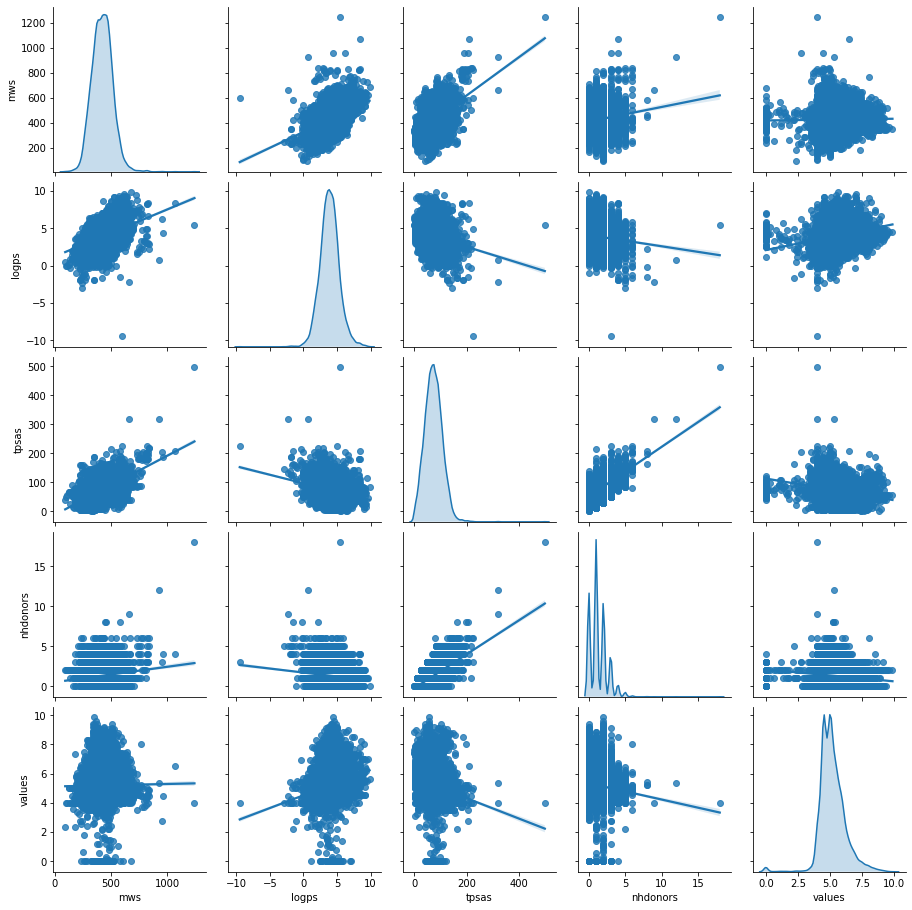

In [6]:
sns.pairplot(og_properties, diag_kind="kde", kind="reg")

In [7]:
np.corrcoef(og_properties.values.T)

array([[ 1.        ,  0.40026793,  0.56032653,  0.14954407,  0.01529169],
       [ 0.40026793,  1.        , -0.25284653, -0.12237417,  0.2464275 ],
       [ 0.56032653, -0.25284653,  1.        ,  0.60353137, -0.22892422],
       [ 0.14954407, -0.12237417,  0.60353137,  1.        , -0.12875272],
       [ 0.01529169,  0.2464275 , -0.22892422, -0.12875272,  1.        ]])

In [8]:
with open(os.path.join(DATA_PATH, 'importances_scaled.pt'), 'rb') as handle:
    importances = pickle.load(handle)

In [9]:
global_importances = np.vstack(importances['herg_global'][1]) #v2
global_importances.shape

(9984, 4)

In [10]:
global_importances = np.array(global_importances) * 100
global_importances = pd.DataFrame(data=global_importances, columns=['mws', 'tpsas', 'logps', 'nhdonors'])
global_importances['values'] = values

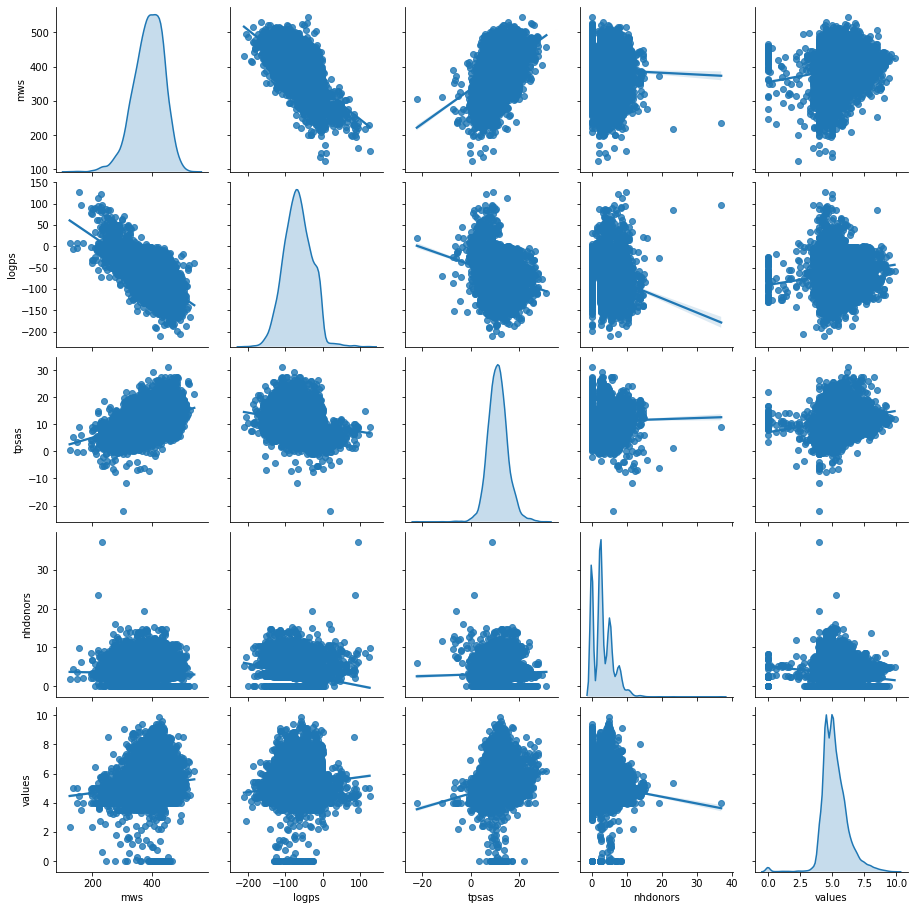

In [11]:
sns.pairplot(global_importances, diag_kind="kde", kind="reg")

In [12]:
np.corrcoef(global_importances.values.T)

array([[ 1.        , -0.64006011,  0.40294427, -0.02864547,  0.13705639],
       [-0.64006011,  1.        , -0.21619115, -0.25212296,  0.12804488],
       [ 0.40294427, -0.21619115,  1.        ,  0.03012074,  0.19682647],
       [-0.02864547, -0.25212296,  0.03012074,  1.        , -0.13002984],
       [ 0.13705639,  0.12804488,  0.19682647, -0.13002984,  1.        ]])